<a href="https://www.kaggle.com/code/xshaimaa/auto-mpg-dataset-analysis?scriptVersionId=93821948" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Dataset Description 
The MPG dataset is technical spec of cars originaly provided from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg). The data concerns city-cycle fuel consumption in miles per gallon to be analyzed in terms of 3 multivalued discrete and 5 continuous attributes.
___

## Columns Description
1. `mpg`: miles per galon of fuel (continuous variable).
2. `cylinders`: number of engine cylinders (multi-valued discrete variable).
3. `displacement`: (continuous variable)
4. `horsepower`: the power produced by engine to move the car (continuous variable)
5. `weight`: car weight (continuous variable)
6. `acceleration`: the acceleration an engine can get per second (continuous variable)
7. `model year`: car release year from 1970 to 1982(multi-valued discrete variable)
8. `origin`: car manufacturing place (1 -> USA, 2 -> Europe, 3 -> Asia) (multi-valued discrete variable)
9. `car name`: car model name (unique for each instance)
___

## Environment set-up

In [5]:
# importing lib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

___
## Data Wrangling 
We'd load our desired data from the flat csv file `auto-mpg.csv` to a dataframe using `pandas`, and display its first 5 records. here, we want to check for:
- Missingness in our dataframe.
- Inconsistent data types.
- Duplicated rows.
- columns to be droped or re-parsed.

In [6]:
# loading the mpg dataset from the filepath
mpg_filepath = 'auto-mpg-2.csv'
mpg_df = pd.read_csv(mpg_filepath)

In [7]:
# taking a look at the dataset's head
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
# checking for any duplicated rows
mpg_df.duplicated().sum()

0

- `horsepower` column have inconsistant data type.

In [10]:
# checking columns' unique values
mpg_df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [11]:
mpg_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
(mpg_df['horsepower'] == '?').sum()

6

- It seems like we have `6` values in `horsepower` column containing `?`, and that is what is giving us the object data type instead of int.

### **Exploring Summary**
- Our dataset has a total of 398 records and 9 columns.
- We have no NaNs in our dataset nor duplicated rows.
- `horsepower` column have inconsistant data type that needs to be handled and casted to `int`.
- `origin` would need to be parsed and casted into a categorical datatype.
- No columns would need to be dropped.
___

## Data Cleaning
Here, we'd perform cleaning operations (dropping rows, mapping columns, converting data types). All of which would help us reach a more accurate result in creating meaningful and informative visualizations.


### **Cleaning `horsepower` column**
We'd drop each row that contains a `?` on the `horsepower` column.

In [13]:
# droping '?' values
mpg_df = mpg_df[mpg_df.horsepower != '?']

# confirming changes
(mpg_df.horsepower == '?').sum()

0

In [14]:
#casting horsepower column to integer
mpg_df.horsepower = mpg_df.horsepower.astype(int)

# confirming changes
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


___
### **Handling `origin` column**

We'd map `origin` column according to the provided description (1 -> USA, 2 -> Europe, 3 -> Asia), and cast its datatype as `category`.

In [15]:
# parsing origin column
mpg_df.loc[mpg_df.origin == 1, 'origin'] = 'USA'
mpg_df.loc[mpg_df.origin == 2, 'origin'] = 'Europe'
mpg_df.loc[mpg_df.origin == 3, 'origin'] = 'Asia'

# casting origin column into category
mpg_df['origin'] = mpg_df['origin'].astype('category')

# validating changes
mpg_df['origin'].dtype

/var/folders/hh/1zlly3jj27j032_fwpr2wstm0000gn/T/ipykernel_99079/820984040.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mpg_df.loc[mpg_df.origin == 1, 'origin'] = 'USA'


CategoricalDtype(categories=['Asia', 'Europe', 'USA'], ordered=False, categories_dtype=object)

Now, our dataframe is tidy and clean, and we are ready to move into visualizing it to get some meaningful insights!
___

## Data Visualization
In this section, we'd use some informative visuals to help us draw insights and conclusions about our data and also help us in our EDA.

Let's first have a quick look at the summery statistics of our dataset.

In [16]:
# displaying summary statistics
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


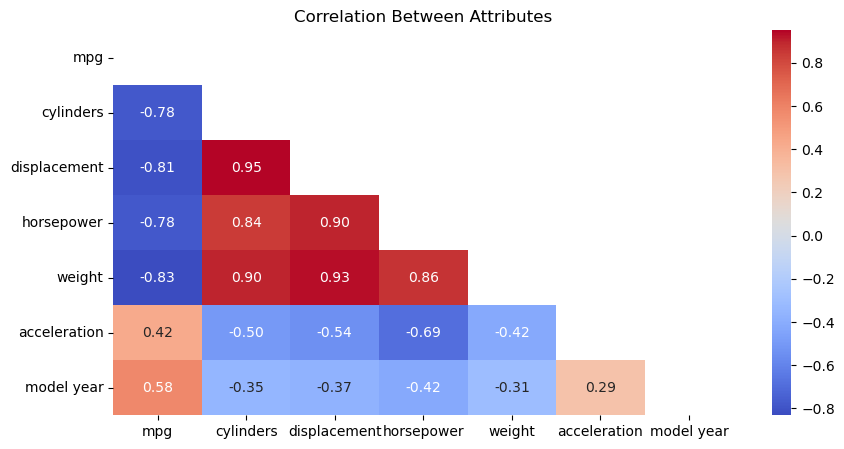

In [17]:
# plotting correlation heatmap
plt.figure(figsize=(10, 5))

# Select only numeric columns
numeric_mpg_df = mpg_df.select_dtypes(include=['number'])

# Compute correlation
corr = numeric_mpg_df.corr()

# Create mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
sns.heatmap(corr, annot=True, mask=mask, fmt='.2f', cmap="coolwarm")
plt.title("Correlation Between Attributes")
plt.show()


___
Taking a closer look into the `model year` distribution

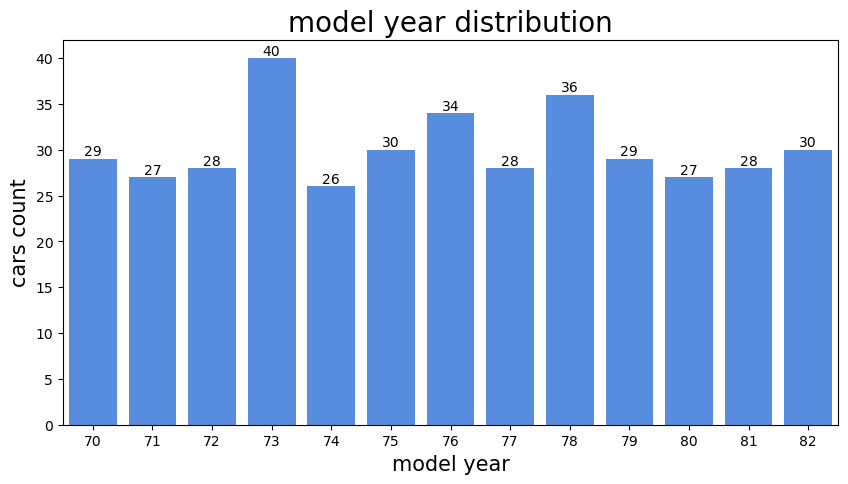

In [18]:
# displaying histgram of model year column
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'model year', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("model year distribution", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

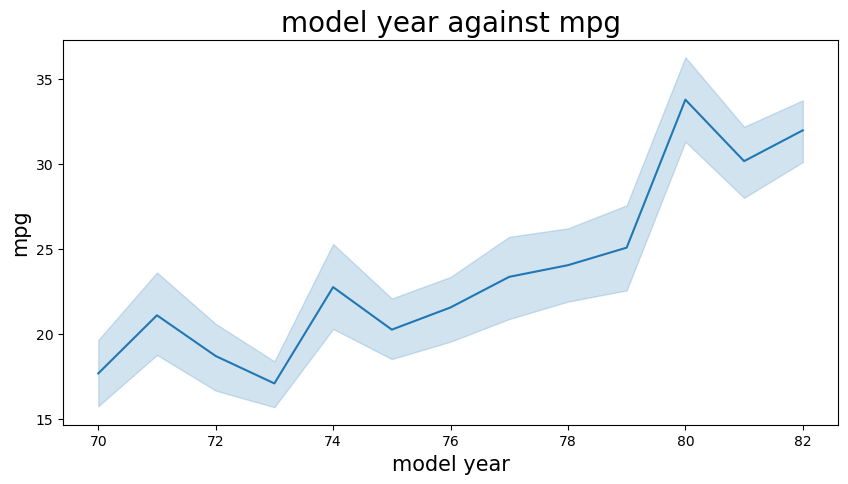

In [19]:
# ploting model year against mpg
plt.figure(figsize=(10,5))
plt.title("model year against mpg", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
sns.lineplot(x = 'model year', y = 'mpg', data = mpg_df);

From the above visualizations, we we may totice the following:
- Our dataset contains info about cars from 1970 to 1982.
- Most of the cars are produced in `1973`.
- As years pass after `1973`, there has been a noticable increase in `mpg`.

___
Now, let's take a closer look at `mpg` coulmn.

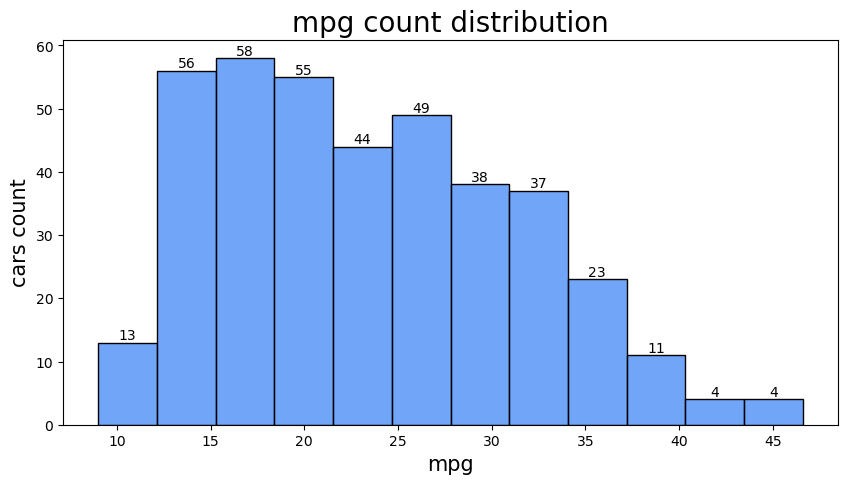

In [20]:
# ploting mpg distribution
plt.figure(figsize=(10,5))
ax = sns.histplot(x = 'mpg', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("mpg count distribution", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

- Most of the cars in our dataset have mpg between 15 to 20. Our data is also skewed to the right.

let's compare these findings to `cylinders` and `horsepower` columns.

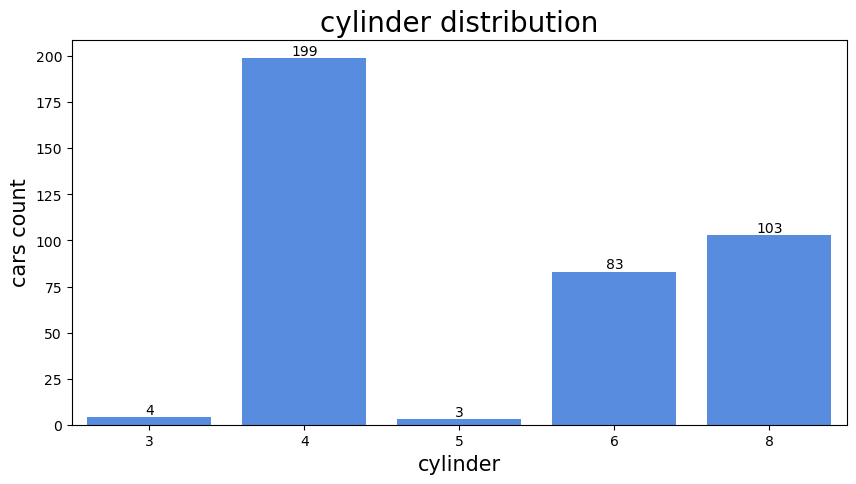

In [21]:
# displaying cylinder column distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'cylinders', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("cylinder distribution", fontsize = 20)
plt.xlabel("cylinder", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

- The vast majority in cars have `4` cylinder engine.

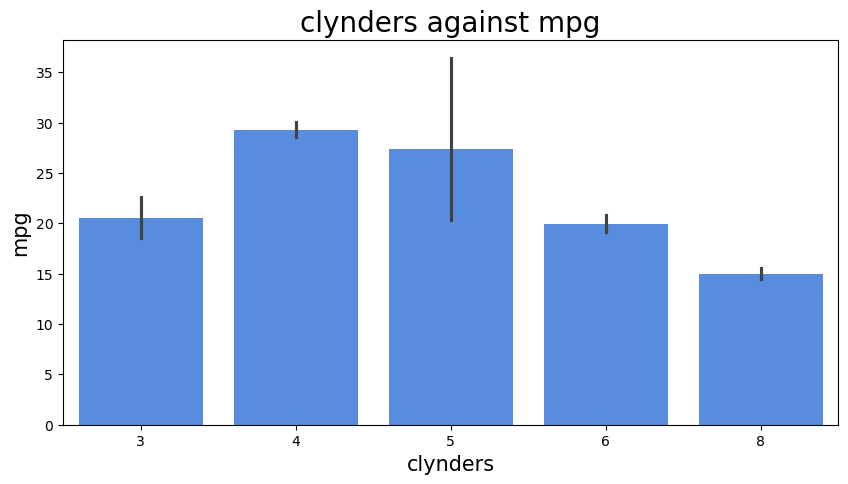

In [22]:
# ploting clynders against mpg
plt.figure(figsize=(10,5))
sns.barplot(x = 'cylinders', y = 'mpg', data = mpg_df, color = '#4287f5')
plt.title("clynders against mpg", fontsize = 20)
plt.xlabel("clynders", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

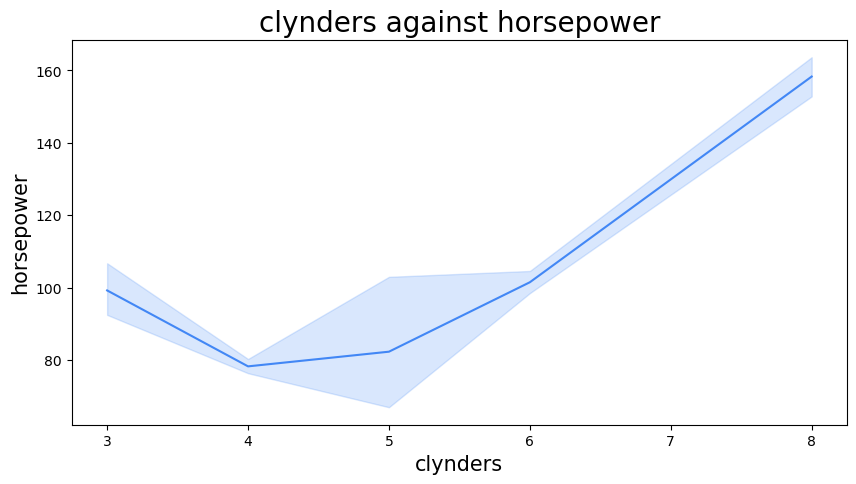

In [23]:
# ploting cylinders anainst horsepower
plt.figure(figsize=(10,5))
sns.lineplot(x = 'cylinders', y = 'horsepower', data = mpg_df, color = '#4287f5')
plt.title("clynders against horsepower", fontsize = 20)
plt.xlabel("clynders", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

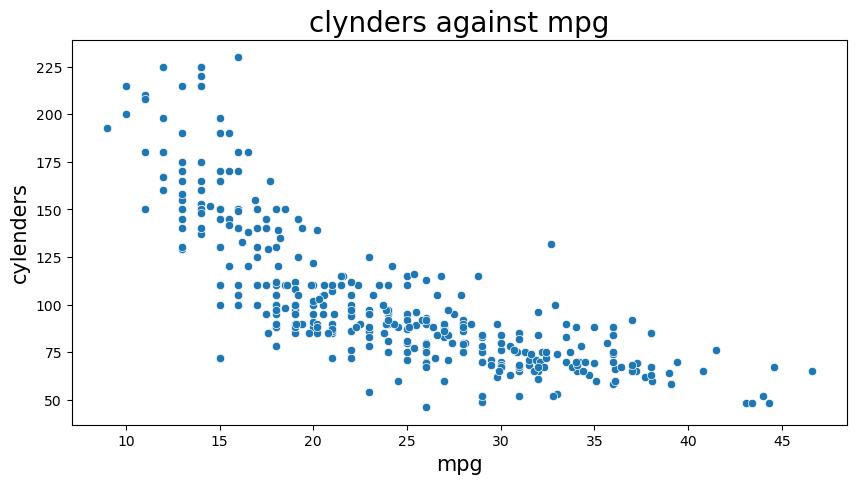

In [24]:
# ploting mpg against horsepower
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'mpg', y = 'horsepower', data = mpg_df)
plt.title("clynders against mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("cylenders", fontsize = 15)
plt.show()

From the above visuals, we can notice that:
- As `cylinders` in the engine increases above 4, `MPG` decreases.
- As `cylinders` in the engine increases above 4, engine `horsepower` increases.
- there is negative correlation between `mpg` and `horsepower`.

___
Next, we'll move into exploring `origin` column and find insights about each manufacturing country.

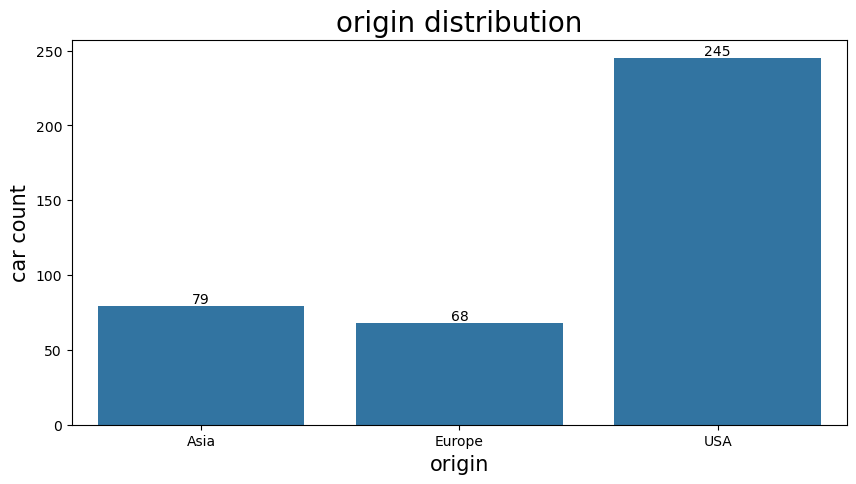

In [25]:
# ploting cars origin dist.
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'origin', data = mpg_df)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("origin distribution", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()

- We can see that `USA` alne produces more than 64% of the total cars in our dataset.

Let's explore its relations between other columns.

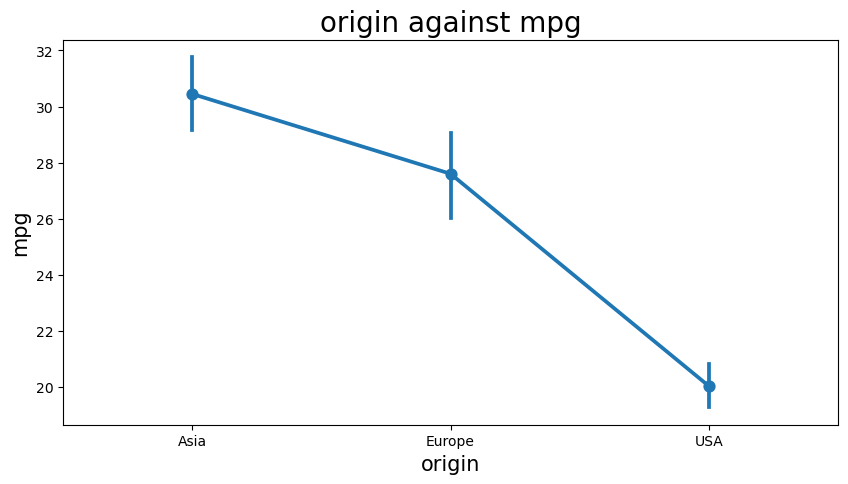

In [26]:
# ploting origin anainst mpg
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'mpg', data = mpg_df)
plt.title("origin against mpg", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

- Althogh `USA` has the biggest count of our dataset, it produces cars we relatively very low `mpg` compared to `Asia` and `Europe`
- `Asia` is the leading contry in producing cars with high `mpg` with a mean close to 30.

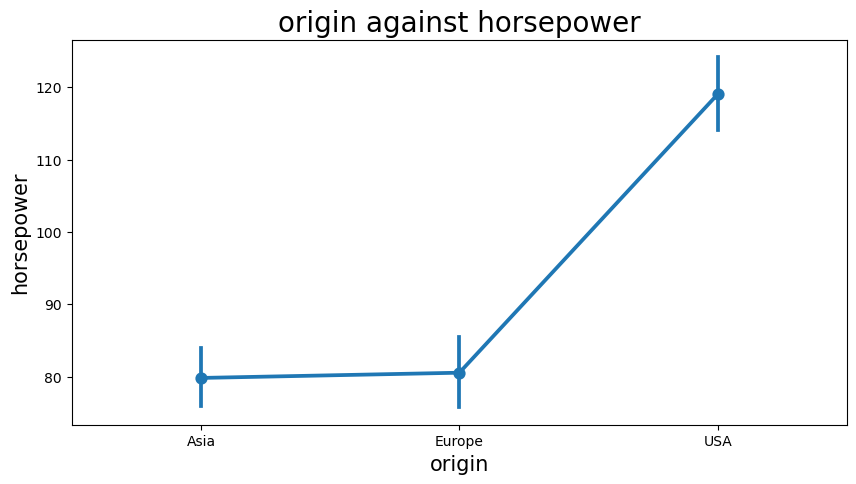

In [27]:
# ploting origin anainst horsepower
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'horsepower', data = mpg_df)
plt.title("origin against horsepower", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

- As expected, `USA` has the highest engine `horsepower`. This implies the previously observed conclusion that `hoursepower` and `mpg` has a negative correlation.

/var/folders/hh/1zlly3jj27j032_fwpr2wstm0000gn/T/ipykernel_99079/1755580562.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = 'model year', y = 'mpg', hue = 'origin', data = mpg_df, ci = None);


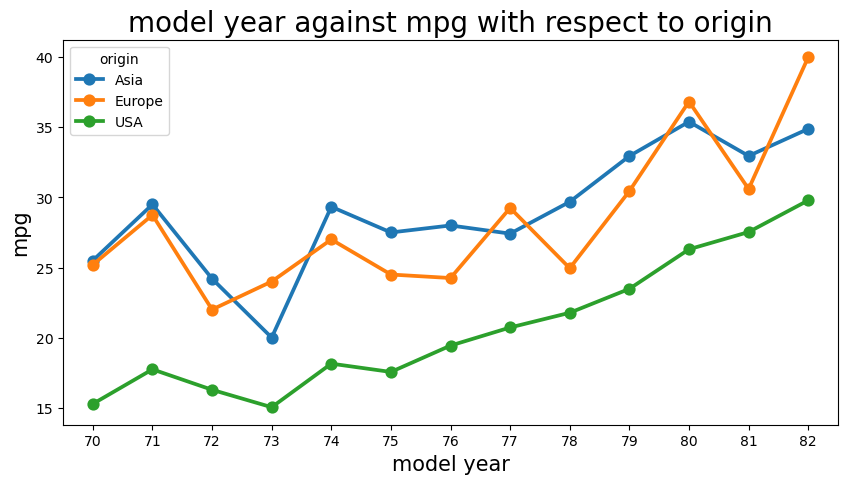

In [28]:
# display model year against mpg with respect to origin
plt.figure(figsize=(10,5))
sns.pointplot(x = 'model year', y = 'mpg', hue = 'origin', data = mpg_df, ci = None);
plt.title("model year against mpg with respect to origin", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

- This chart also implies the positive correlation between `model year` and `mpg`, and shows that `Asia` has been leading country in this industry, followed by `Europe` and `USA` comes in the last place.

___
Let's now explore how `weight` has been affecting our car specs over the years.

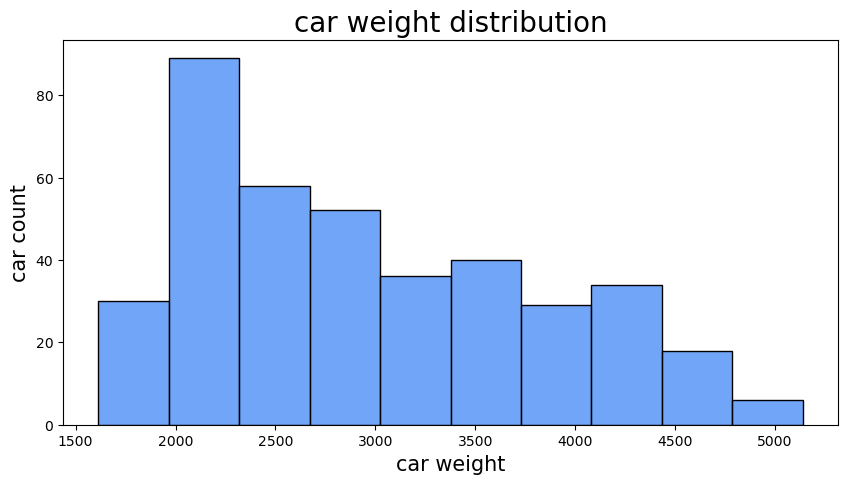

In [29]:
# plot a dist. of car weight
plt.figure(figsize=(10,5))
sns.histplot(x = 'weight', data = mpg_df, color = '#4287f5')
plt.title("car weight distribution", fontsize = 20)
plt.xlabel("car weight", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()

- car `weight` varies from 1500 to 5000, with the majority of cars at 2000.

/var/folders/hh/1zlly3jj27j032_fwpr2wstm0000gn/T/ipykernel_99079/1679678057.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = 'model year', y = 'weight', data = mpg_df,


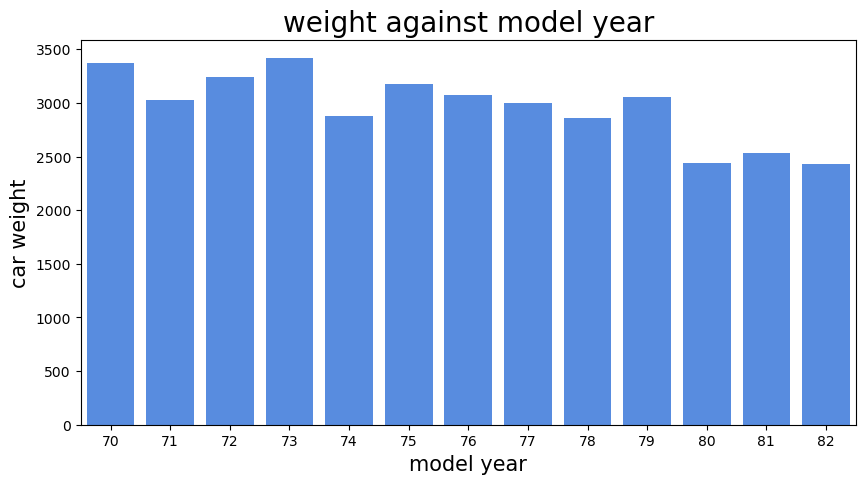

In [30]:
# plotting weight against model year
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'model year', y = 'weight', data = mpg_df,
                 color = '#4287f5', ci = None)
plt.title("weight against model year", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

- Car `weight` has been decreasing over the years. 

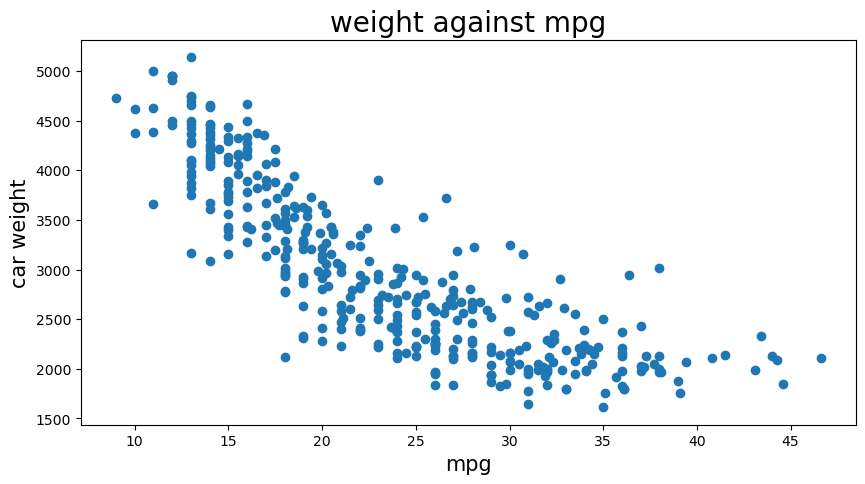

In [31]:
# plotting weight against mpg
plt.figure(figsize=(10,5))
plt.scatter(x = 'mpg', y = 'weight', data = mpg_df)
plt.title("weight against mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

- `mpg` inceases as `weight` decreses over time, that indecates a stron correlation between them.

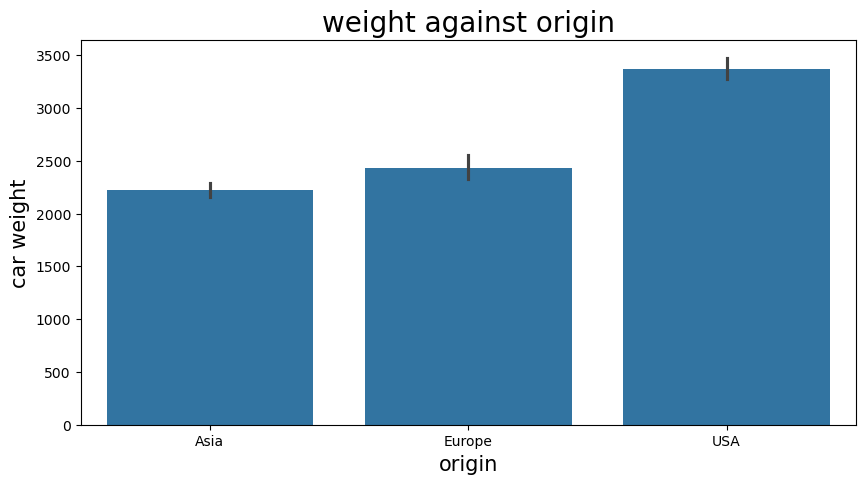

In [32]:
# plotting weight against origin
plt.figure(figsize=(10,5))
sns.barplot(x = 'origin', y = 'weight', data = mpg_df)
plt.title("weight against origin", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

- As expected, `USA` gets the highest possible `weight` values, that explains alot about its low `mpg` and high `horsepower`.
- `Asia` produces the lightest cars campared to `USA` and `Europe`, this also explains itss high `mpg` and low `horsepower`.

___
Let's take a final look at `acceleration` column, and how it is related to `horsepower` and `mpg` to get a better understanding of our findings.

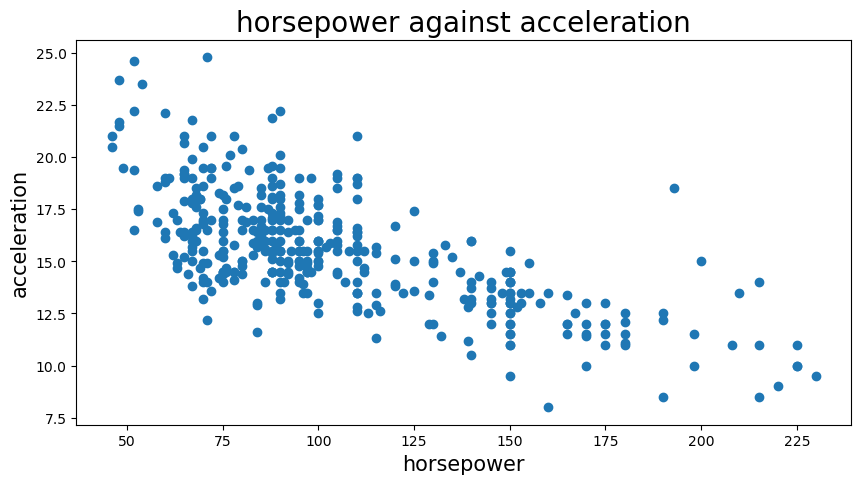

In [33]:
# plotting horsepower against acceleration
plt.figure(figsize=(10,5))
plt.scatter(x = 'horsepower', y = 'acceleration', data = mpg_df)
plt.title("horsepower against acceleration", fontsize = 20)
plt.xlabel("horsepower", fontsize = 15)
plt.ylabel("acceleration", fontsize = 15)
plt.show()

- Wa can spot a negative correlation between `acceleration` and `horepower`, this means that it has a positive one with `mpg`.
___

## Conclusion
In this section, we'd add the conclusions we draw from the previous visualisations.
- As years pass after `1973`, there has been a noticable increase in `mpg`.
- As `cylinders` in the engine increases above 4, `MPG` decreases and engine `horsepower` increases. That indicates negative correlation between `mpg` and `horsepower`.
- `mpg` increases as `weight` decreses over time, that also indecates a stron correlation between them.
- Althogh `USA` has the biggest count of produced cars, its cars has relatively very low `mpg`, thus the highest possible `weight` compared to `Asia` and `Europe`
- `Asia` is the leading contry in producing cars with high `mpg` with a mean close to 30, and it produces the lightest cars
- Wa can spot a negative correlation between `acceleration` and `horepower`, this means that it has a positive one with `mpg`.